In [11]:
from TopographyDownloader import TopographyData
# Define region of interest
region_points = [-29.927167, -29.956396, -71.235755,  -71.206745]







# Create TopographyData object
topo_data = TopographyData(region_points)

# Specify path for data download
path = r"C:\Users\chow-\Desktop\MUYSC2\MUYSC\Modules"

# Download data to specified path
topo_data.download_to_path(path)

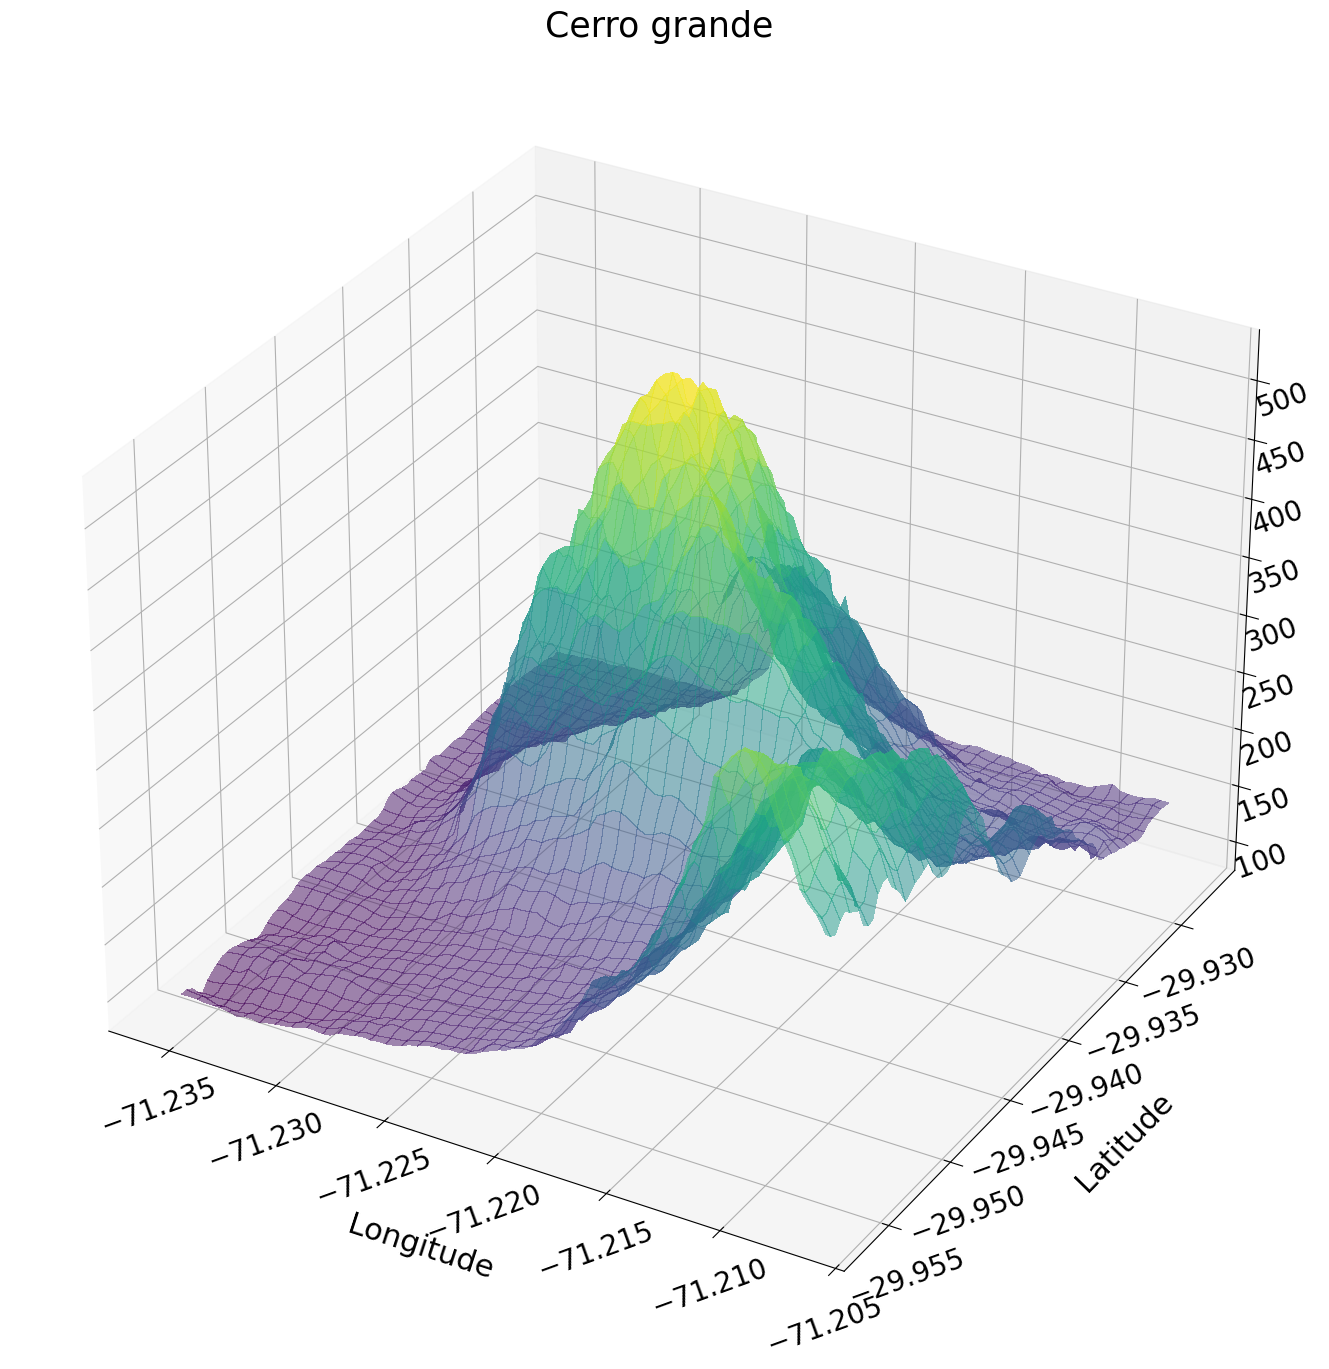

In [13]:
from matplotlib import cm
from srtm import Srtm1HeightMapCollection
from MuyscImprove import Mute
# Crear un objeto SRTM para el mapa de elevación
srtm1_data = Srtm1HeightMapCollection()

# Define la región de estudio
region = [-29.927167, -29.956396, -71.235755,  -71.206745,   "Cerro grande "]

# Resolución de la grilla (por ejemplo, 100x100 puntos)
points = 80

# Mapa de color
cmap = cm.viridis

# Instancia de la clase Mute
mute_simulation = Mute(region, points, srtm1_data, cmap)

# Inicializar y calcular la topografía
mute_simulation.elevation()

# Graficar la estructura geológica
mute_simulation.plot_structure()


In [1]:
import numpy as np
from Telescope import telescopeParams

nBars_value = 60  # Number of scintillator strips per side per panel
d_value = 3.4  # Assume some value for pixel size in cm
D_value = 200  # Assume some value for panel separation
L_value = 1750  # Assume some value for distance from the objetive in meters
cmap = "jet" # Color map
# Create an object of the telescopeParams class
my_telescope = telescopeParams(nBars_value, d_value, D_value, L_value, cmap, "Detector 2")

Aperture = np.arctan(nBars_value*d_value/D_value)
Ang = Aperture*180/(2.0*np.pi)

cenit = [-Ang, Ang, 2*nBars_value -1]
azimut = [-Ang, Ang, 2*nBars_value -1]

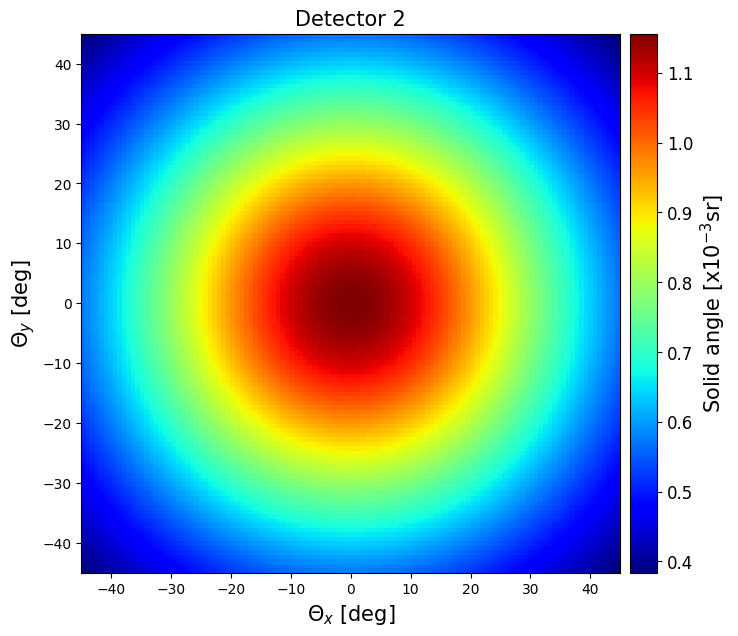

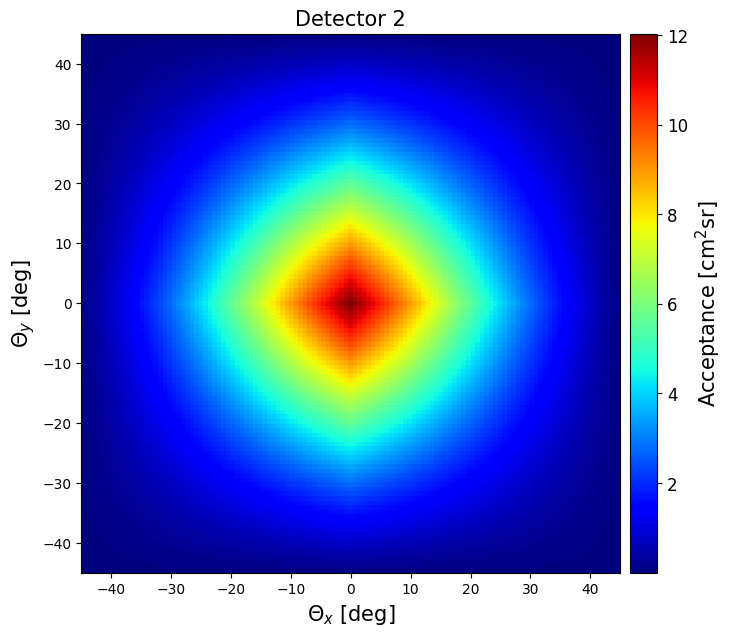

c:\Users\chow-\Desktop\MUYSC2\MUYSC\Modules\Telescope.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labelsx.astype(int))
c:\Users\chow-\Desktop\MUYSC2\MUYSC\Modules\Telescope.py:260: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labelsy.astype(int))
c:\Users\chow-\Desktop\MUYSC2\MUYSC\Modules\Telescope.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labelsx.astype(int))
c:\Users\chow-\Desktop\MUYSC2\MUYSC\Modules\Telescope.py:260: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labelsy.astype(int))
c:\Users\chow-\Desktop\MUYSC2\MUYSC\Modules\Telescope.py:259: UserWarnin

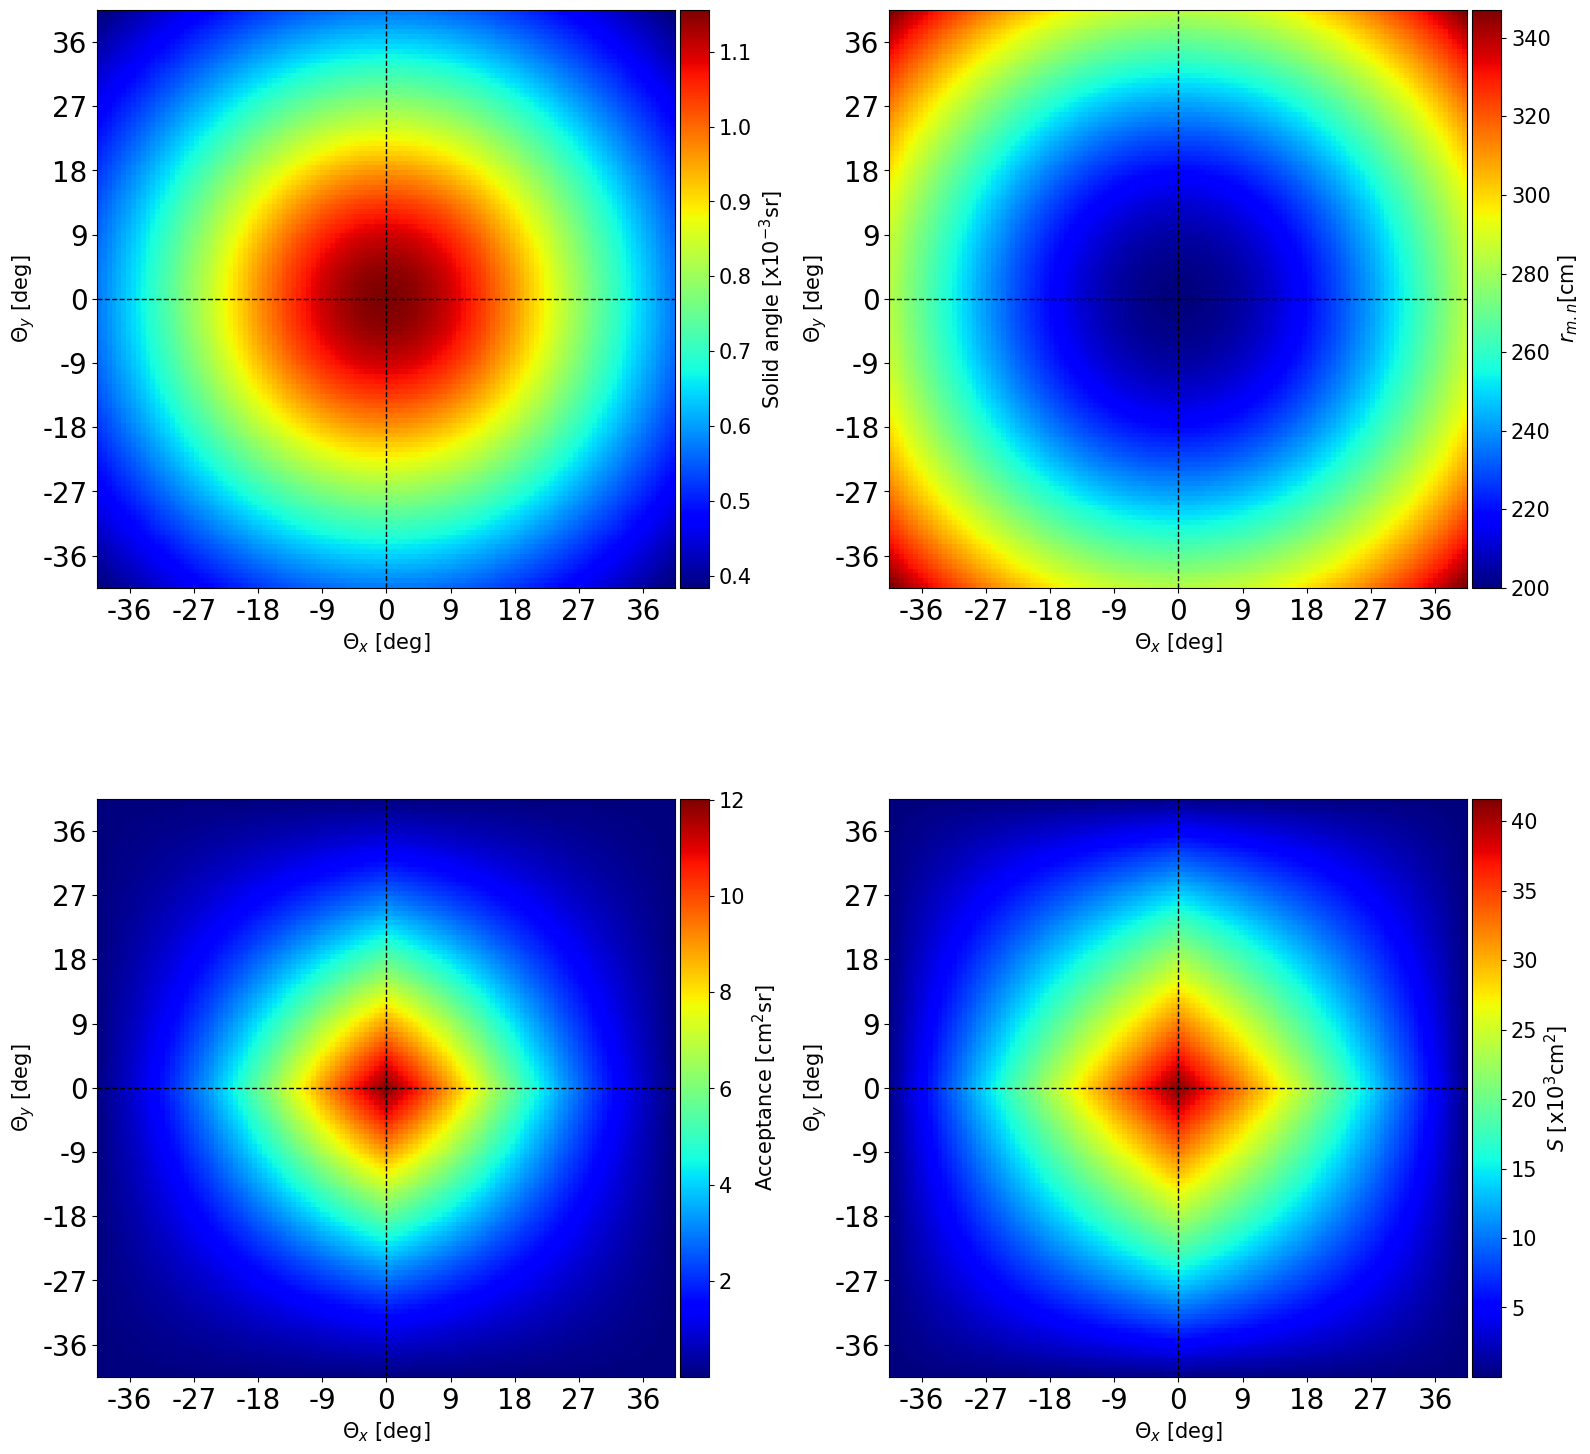

In [2]:
# Calculate and plot different parameters of the telescope
my_telescope.solid_angle()
my_telescope.N_pixel()
acceptance = my_telescope.acceptance()
my_telescope.S_pixels()
my_telescope.plot_all_params()

In [26]:


from srtm import Srtm1HeightMapCollection
from MuyscImprove import Mute

srtm1_data = Srtm1HeightMapCollection()
srtm1_data.build_file_index()
data_path = r"C:\Users\chow-\Desktop\muography\S30W072.SRTMGL1.hgt.zip"
Obs_P1 = [-29.950,-71.235]
Ref_P = [-29.9375,-71.224]
Topography_cut = [-29.927167, -29.956396, -71.235755,  -71.206745, "Cerro grande"]


Measure = Mute(Topography_cut, 80, srtm1_data, "jet")

In [27]:
Measure.elevation()

In [28]:
Measure.pointView(Obs_P1, Ref_P)

Elevation = 16.807242


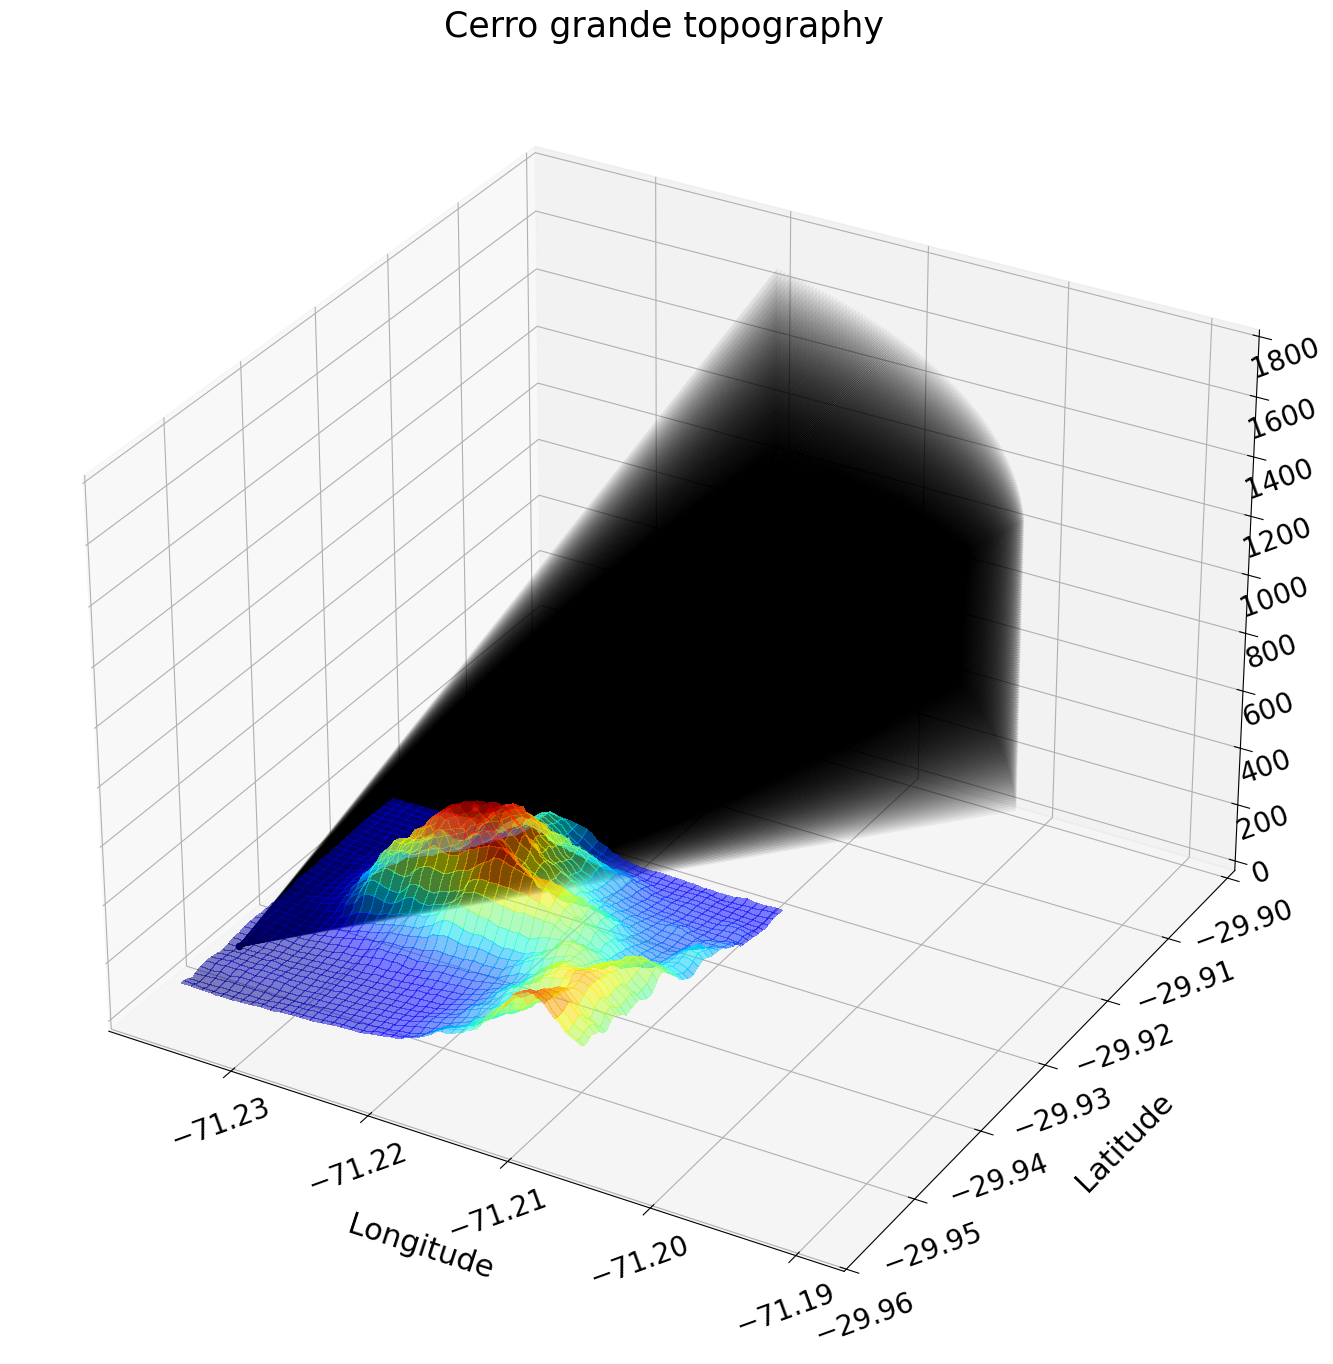

In [29]:
Measure.plot_lines(cenit, azimut) 

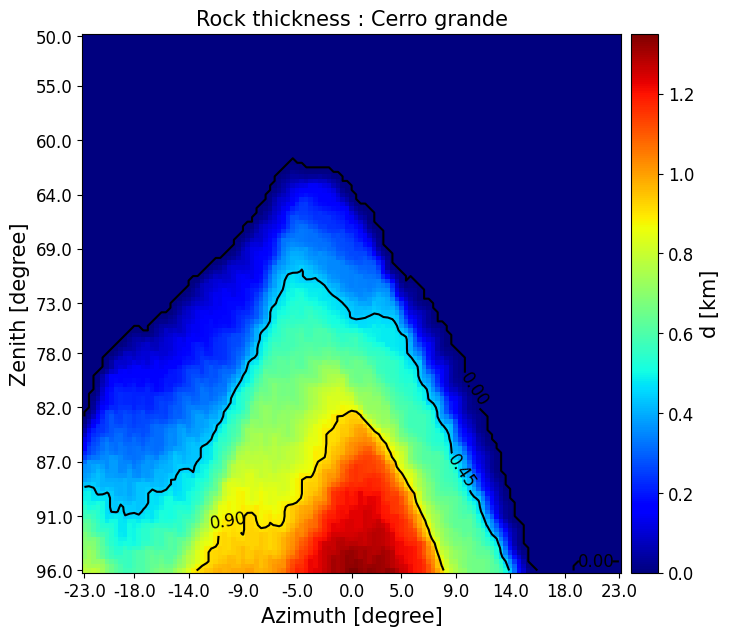

In [30]:
Measure.show_distances()

In [31]:
Measure.distances.max()

np.float64(1350.5390456716714)

In [32]:
dist_matrix = Measure.distances

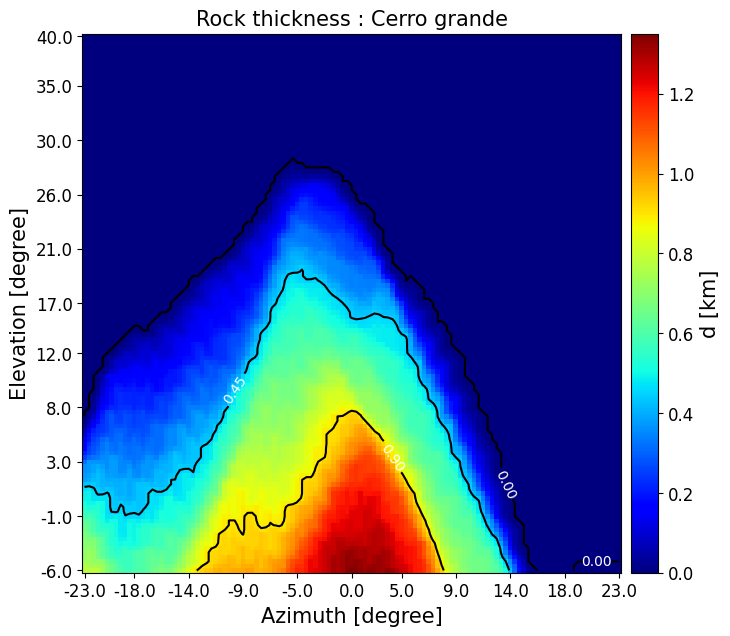

In [33]:
Measure.show_distances_no_extent()

Elevation : 11.496700


c:\Users\chow-\Desktop\MUYSC2\MUYSC\Modules\FluxModels.py:83: RuntimeWarning: invalid value encountered in log10
  y = np.log10(p*np.cos(theta)) # Bugaev/Reyna model


Time: 201.486211 s


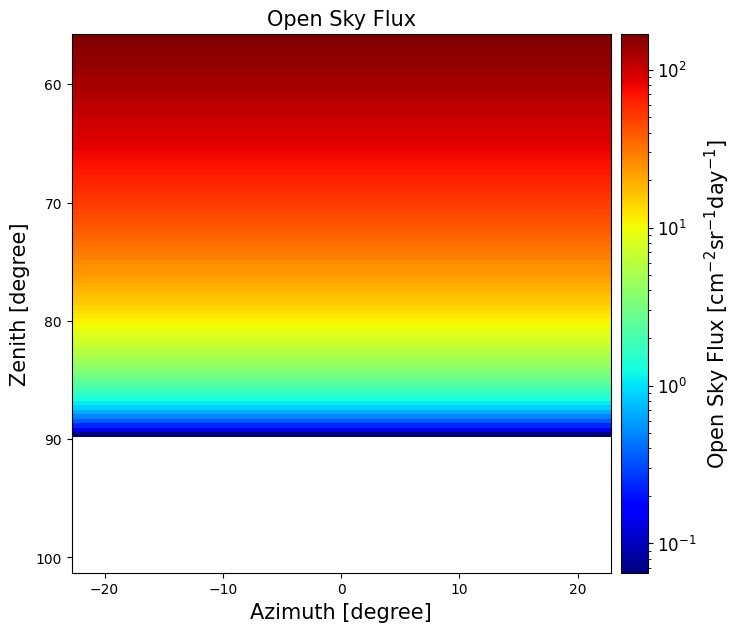

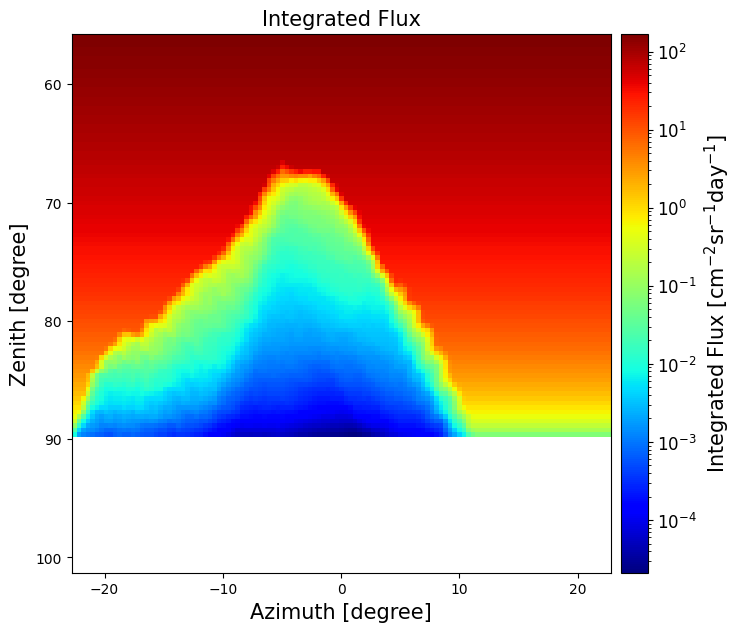

In [34]:
cross_flux, open_flux = Measure.Flux()

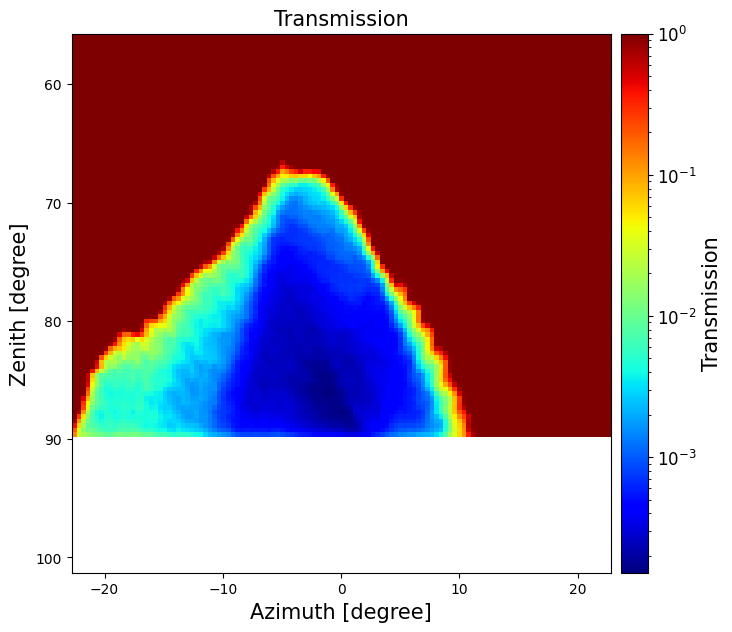

In [35]:
transmission = Measure.Transmission()

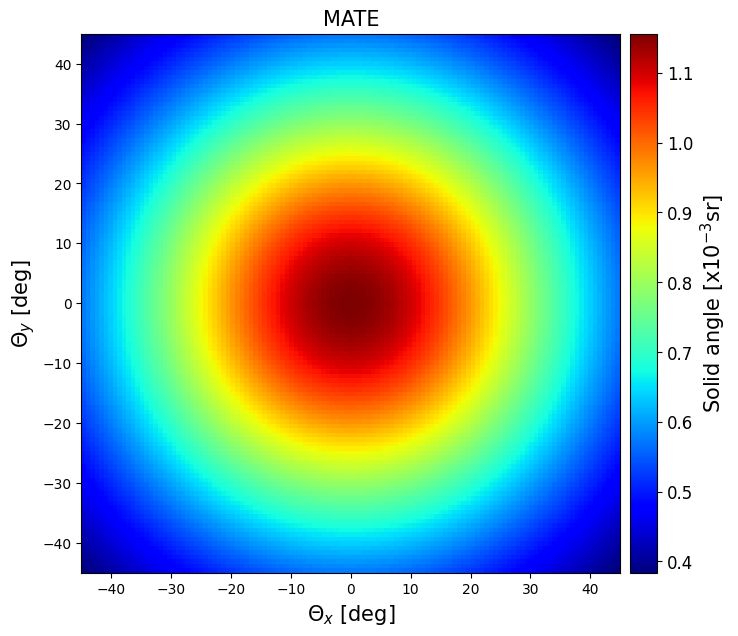

In [37]:
solid = my_telescope.solid_angle()
# Flux in muons/m2s
rate = cross_flux*solid*1e4/86400

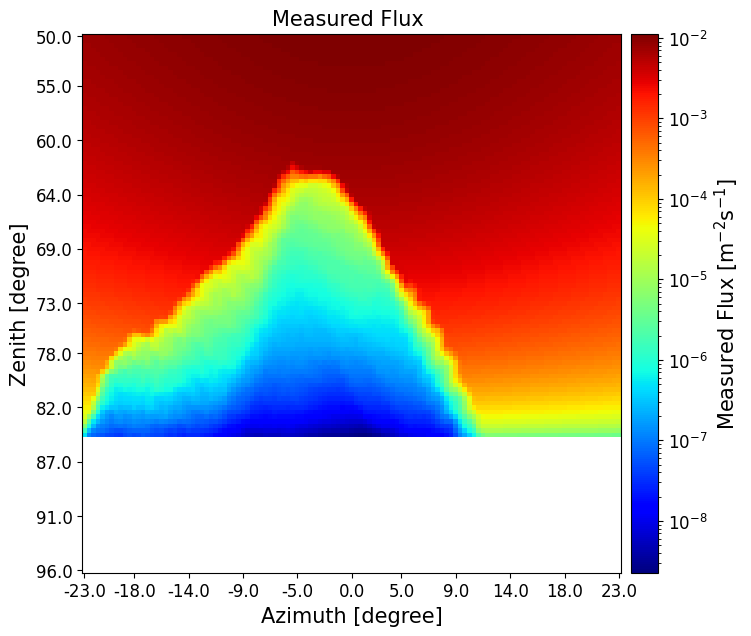

In [38]:
Measure.plot_mesured_flux(rate, "Measured Flux ", "[m$^{-2}$s$^{-1}$]")

In [39]:
my_telescope.N_pixel()

In [47]:
# Muon counting in a observation period
obs_time = 30 # days
N_muon = cross_flux*acceptance*obs_time


NameError: name 'acceptance' is not defined